# Segmentasi Citra Sapi Menggunakan Metode Numerik
* I Gusti Agung Premananda
* Konang Tyagazain Nirangkara
* R. Ferdian Dita Nugraha
* Fadgham Albar Ronggoputra

# Definisikan Library

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import math

# Meng-Import Gambar

In [ ]:
image_path = "./sapi_x.jpeg"
image = cv.imread(image_path)

In [ ]:
# convert image to grayscale without using opencv
def convert_grayscale(image):
    grayscale_image = []
    for i in range(len(image)):
        grayscale_image.append([])
        for j in range(len(image[i])):
            grayscale_image[i].append(
                int(0.3 * image[i][j][0] + 0.59 * image[i][j][1] + 0.11 * image[i][j][2]))
    return grayscale_image

In [ ]:
gray = convert_grayscale(cv.imread(image_path))
plt.imshow(gray, cmap='gray')
plt.axis('off')

# Convert gambar menjadi array

In [ ]:
# Define the new width and height
new_width = 512
new_height = 512

# Get the dimensions of the original image
height, width = len(gray), len(gray[0])

# Create a new empty image with the desired dimensions
resized_image = [[0] * new_width for _ in range(new_height)]

# Calculate the scaling factors
width_scale = width / new_width
height_scale = height / new_height

# Iterate over the new image pixels
for y in range(new_height):
    for x in range(new_width):
        # Calculate the corresponding position in the original image
        orig_x = int(x * width_scale)
        orig_y = int(y * height_scale)

        # Set the RGB values in the resized image
        resized_image[y][x] = gray[orig_y][orig_x]

In [ ]:
# Get the dimensions of the array
new_height = len(gray)
new_width = len(gray[0])

# Create a blank image with the desired dimensions
image = [[(0, 0, 0)] * new_width for _ in range(new_height)]

# Convert the RGB values to the image
for y in range(new_height):
    for x in range(new_width):
        # Set the RGB values in the image
        image[y][x] =  gray[y][x]

# Create a 256*256 white image
display_image = cv.imread(image_path)

# Set the RGB values in the display image
for y in range(display_image.shape[0]):
    for x in range(display_image.shape[1]):
        # Get the RGB values from the image

        if y < new_height and x < new_width:
          # Set the RGB values in the display image
          display_image[y, x] = image[y][x]
          continue
        display_image[y, x] = [0, 0, 0]

# Display the image
plt.imshow(resized_image, cmap="gray")
plt.axis('off')
print(resized_image)

[0, 0] [0, 511] [511, 0] [511, 511]
[[56, 44, 46, 48, 41, 44, 68, 74, 89, 56, 61, 68, 86, 98, 57, 63, 46, 51, 55, 42, 46, 53, 58, 67, 61, 54, 74, 79, 55, 32, 86, 32, 31, 85, 101, 111, 28, 31, 31, 37, 34, 24, 29, 31, 24, 16, 17, 26, 15, 17, 21, 16, 16, 13, 20, 30, 21, 15, 37, 30, 8, 20, 17, 21, 17, 15, 18, 32, 12, 16, 21, 19, 18, 16, 15, 13, 17, 14, 21, 26, 33, 29, 28, 29, 29, 27, 32, 35, 30, 40, 51, 38, 44, 49, 49, 29, 35, 48, 39, 39, 45, 59, 78, 83, 85, 59, 67, 72, 38, 82, 62, 63, 54, 46, 53, 51, 68, 55, 49, 59, 48, 51, 61, 65, 74, 73, 47, 26, 22, 32, 96, 93, 69, 81, 86, 94, 85, 90, 83, 49, 65, 72, 53, 71, 45, 67, 49, 46, 47, 34, 22, 26, 19, 20, 18, 18, 19, 24, 26, 23, 34, 27, 31, 30, 30, 28, 25, 26, 34, 27, 23, 24, 27, 23, 30, 38, 37, 43, 47, 42, 34, 30, 30, 32, 29, 32, 27, 32, 32, 28, 34, 36, 37, 29, 52, 61, 41, 54, 51, 82, 76, 60, 63, 50, 59, 46, 27, 26, 30, 38, 53, 34, 24, 64, 62, 62, 43, 50, 70, 77, 84, 82, 69, 58, 54, 33, 48, 41, 46, 68, 96, 61, 54, 33, 49, 65, 51, 20, 73, 107, 

(-0.5, 511.5, 511.5, -0.5)

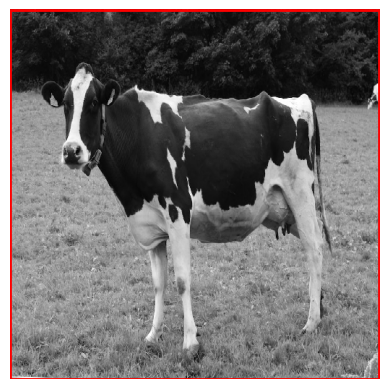

In [ ]:
x = len(resized_image[0])
y = len(resized_image[1])

left = y
for i in range(x):
  for j in range(y):
    if(resized_image[i][j]<128):
      if(j<left):
        left = j

right = 0
for i in range(x):
  for j in range(y-1,-1,-1):
    if(resized_image[i][j]<128):
      if(j>right):
        right = j

top = x
for i in range(x):
  for j in range(y):
    if(resized_image[i][j]<128):
      if(i<top):
        top = i

bot = 0
for i in range(x-1,-1,-1):
  for j in range(y):
    if(resized_image[i][j]<128):
      if(i>bot):
        bot = i

top_left = [top,left]
top_right = [top,right]
bot_left = [bot,left]
bot_right = [bot,right]
print(top_left,
      top_right,
      bot_left,
      bot_right)

from matplotlib.patches import Rectangle
plt.gca().add_patch(Rectangle((left,top),right-left,bot-top,
                    edgecolor='red',
                    facecolor='none',
                    lw=2))
print(resized_image)
plt.imshow(resized_image, cmap="gray")
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

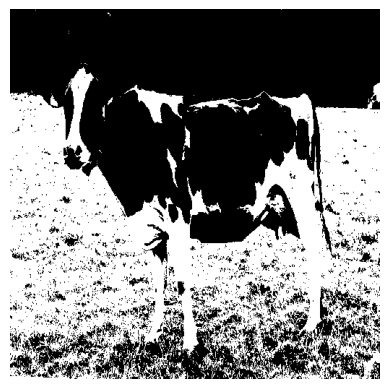

In [ ]:
for i in range(x):
  for j in range(y):
    if(resized_image[i][j]>=128):
      resized_image[i][j] = 255
    else:
      resized_image[i][j] = 0

plt.imshow(resized_image, cmap="gray")
plt.axis('off')

# Mendefinisikan Fungsi Deteksi

In [ ]:
def apply_gaussian_blur(image, radius, sigma):
    height, width = len(image), len(image[0])
    blurred_image = [[0 for _ in range(width)] for _ in range(height)]

    # Create the Gaussian kernel
    size = radius * 2 + 1
    kernel = [[(1 / (2 * 3.14159 * sigma ** 2)) * \
              2.71828 ** (-((x - radius) ** 2 + (y - radius) ** 2) / (2 * sigma ** 2)) \
              for y in range(size)] for x in range(size)]

    # Normalize the kernel
    kernel_sum = sum(sum(kernel_row) for kernel_row in kernel)
    kernel = [[value / kernel_sum for value in kernel_row] for kernel_row in kernel]

    # Apply the blur
    for x in range(radius, height - radius):
        for y in range(radius, width - radius):
            pixel_sum = 0
            for i in range(size):
                for j in range(size):
                    pixel_sum += image[x - radius + i][y - radius + j] * kernel[i][j]
            blurred_image[x][y] = int(pixel_sum)

    return blurred_image


(-0.5, 511.5, 511.5, -0.5)

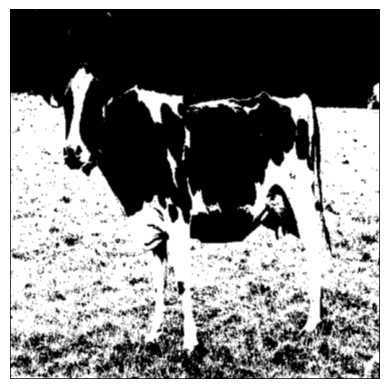

In [ ]:
blurred = apply_gaussian_blur(resized_image, 1, 1.25)
plt.imshow(blurred, cmap='gray')
plt.axis('off')

116.4212417602539


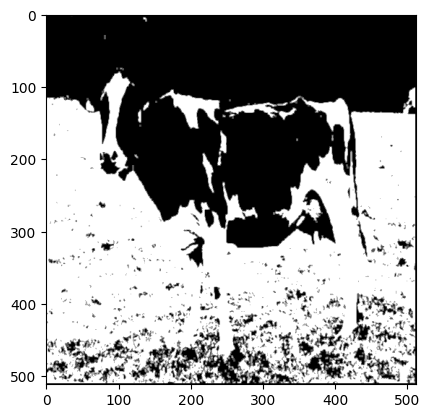

In [ ]:
# flatten multiple dimension array to 1 dimension array
def ravel(array):
    result = []
    for i in range(len(array)):
        for j in range(len(array[i])):
          result.append(array[i][j])
    return result

def mean(array):
    sum = 0
    for i in range(len(array)):
        sum += array[i]
    return sum/len(array)

gray_flattened = ravel(blurred)
gray_mean = mean(gray_flattened)
print(gray_mean)

def segment(image):
  image_cpy = []
  for i in range(len(image)):
      image_cpy.append([])
      for j in range(len(image)):
          image_cpy[i].append(0)

  for i in range(len(image)):
    for j in range(len(image[0])):
      if image[i][j] > gray_mean:
        image_cpy[i][j] = 3
      elif image[i][j] > 0.5 * gray_mean:
        image_cpy[i][j] = 2
      elif image[i][j] > 0.25:
        image_cpy[i][j] = 1
      else:
        image[i][j] = 0
  return image_cpy

segmented = segment(blurred)
plt.imshow(segmented, cmap="gray")



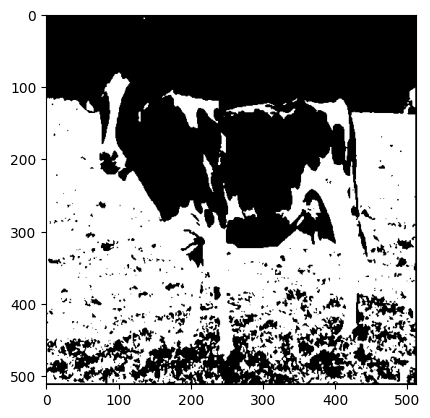

In [ ]:
def otsu_threshold(image):
    height, width = len(image), len(image[0])

    # Calculate histogram
    histogram = [0] * 256
    for x in range(height):
        for y in range(width):
            histogram[image[x][y]] += 1

    # Calculate total number of pixels
    total_pixels = height * width

    # Variables to store optimal threshold and maximum between-class variance
    optimal_threshold = 0
    max_variance = 0

    # Iterate over all possible threshold values
    for threshold in range(256):
        # Variables for background and foreground pixel counts and sums
        background_count = 0
        foreground_count = 0
        background_sum = 0
        foreground_sum = 0

        # Calculate background and foreground pixel counts and sums
        for i in range(threshold):
            background_count += histogram[i]
            background_sum += i * histogram[i]
        for i in range(threshold, 256):
            foreground_count += histogram[i]
            foreground_sum += i * histogram[i]

        # Calculate probabilities and means
        background_probability = background_count / total_pixels
        foreground_probability = foreground_count / total_pixels

        if background_probability == 0 or foreground_probability == 0:
            continue

        background_mean = background_sum / background_count
        foreground_mean = foreground_sum / foreground_count

        # Calculate between-class variance
        between_class_variance = background_probability * foreground_probability * \
                                 ((background_mean - foreground_mean) ** 2)

        # Update optimal threshold if variance is higher
        if between_class_variance > max_variance:
            max_variance = between_class_variance
            optimal_threshold = threshold

    # Apply thresholding
    thresholded_image = [[0] * width for _ in range(height)]
    for x in range(height):
        for y in range(width):
            if image[x][y] > optimal_threshold:
                thresholded_image[x][y] = 255
            else:
                thresholded_image[x][y] = 0

    return thresholded_image

thresholded_image = otsu_threshold(blurred)
plt.imshow(thresholded_image, cmap='gray')

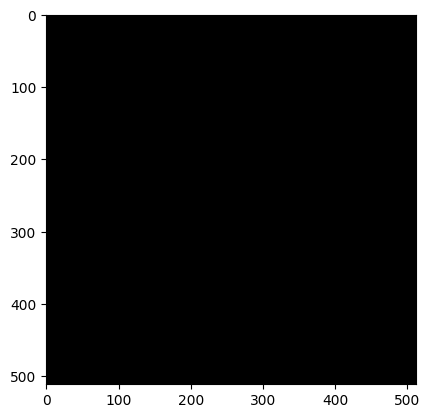

In [ ]:
def otsu_threshold_multi(image, num_thresholds):
    height, width = len(image), len(image[0])

    # Calculate histogram
    histogram = [0] * 256
    for x in range(height):
        for y in range(width):
            histogram[image[x][y]] += 1

    # Calculate total number of pixels
    total_pixels = height * width

    # Variables to store thresholds and maximum between-class variances
    thresholds = []
    max_variances = []

    # Iterate over all possible threshold values
    for _ in range(num_thresholds):
        optimal_threshold = 0
        max_variance = 0

        # Iterate over possible threshold values
        for threshold in range(256):
            # Variables for background and foreground pixel counts and sums
            background_count = 0
            foreground_count = 0
            background_sum = 0
            foreground_sum = 0

            # Calculate background and foreground pixel counts and sums
            for i in range(threshold):
                background_count += histogram[i]
                background_sum += i * histogram[i]
            for i in range(threshold, 256):
                foreground_count += histogram[i]
                foreground_sum += i * histogram[i]

            # Calculate probabilities and means
            background_probability = background_count / total_pixels
            foreground_probability = foreground_count / total_pixels

            if background_probability == 0 or foreground_probability == 0:
                continue

            background_mean = background_sum / background_count
            foreground_mean = foreground_sum / foreground_count

            # Calculate between-class variance
            between_class_variance = background_probability * foreground_probability * \
                                     ((background_mean - foreground_mean) ** 2)

            # Update optimal threshold if variance is higher
            if between_class_variance > max_variance:
                max_variance = between_class_variance
                optimal_threshold = threshold

        # Apply thresholding
        thresholded_image = [[0] * width for _ in range(height)]
        for x in range(height):
            for y in range(width):
                if image[x][y] > optimal_threshold:
                    thresholded_image[x][y] = 255
                else:
                    thresholded_image[x][y] = 0

        thresholds.append(optimal_threshold)
        max_variances.append(max_variance)

        result = []
        for i in range(len(image)):
          result.append([])
          for j in range(len(image)):
              result[i].append(0)

    for i in range(len(image)):
      for j in range(len(image[0])):
        for k in range(len(thresholds)):
          if k == len(thresholds) - 1:
            result[i][j] = 255
            continue

          if image[i][j] > thresholds[k] and image[i][j] < thresholds[k + 1]:
            result[i][j] = thresholds[i]

    return result

thresholded = otsu_threshold_multi(blurred, 3)
plt.imshow(thresholded, cmap='gray')



# Memanggil Fungsi

In [ ]:
# template_matching(gray, template, process='sad')

In [ ]:
# linear interpolation
def linear_interpolation(x, x_values, y_values):
    if len(x_values) != len(y_values):
        raise ValueError("x_values and y_values must have the same length.")

    n = len(x_values)

    # Find the indices of the nearest x-values
    i = 0
    while i < n and x > x_values[i]:
        i += 1

    if i == 0:
        # x is smaller than the smallest x-value, use the first two points
        x0, x1 = x_values[0], x_values[1]
        y0, y1 = y_values[0], y_values[1]
    elif i == n:
        # x is larger than the largest x-value, use the last two points
        x0, x1 = x_values[-2], x_values[-1]
        y0, y1 = y_values[-2], y_values[-1]
    else:
        # x is between two x-values, use the two nearest points
        x0, x1 = x_values[i-1], x_values[i]
        y0, y1 = y_values[i-1], y_values[i]

    # Perform linear interpolation
    y = y0 + (x - x0) * (y1 - y0) / (x1 - x0)

    return y


In [ ]:
# finite difference

def finite_difference(x_values, y_values):
    if len(x_values) != len(y_values):
        raise ValueError("x_values and y_values must have the same length.")

    n = len(x_values)
    derivative_values = []

    for i in range(n):
        if i == 0:
            # Forward difference
            h = x_values[i+1] - x_values[i]
            derivative = (y_values[i+1] - y_values[i]) / h
        elif i == n-1:
            # Backward difference
            h = x_values[i] - x_values[i-1]
            derivative = (y_values[i] - y_values[i-1]) / h
        else:
            # Central difference
            h_forward = x_values[i+1] - x_values[i]
            h_backward = x_values[i] - x_values[i-1]
            derivative = (y_values[i+1] - y_values[i-1]) / (h_forward + h_backward)

        derivative_values.append(derivative)

    return derivative_values


# Feature Extraction

## Gradient Images

In [ ]:
# calculate gradient
def calculate_gradient(image):
    gx = [[0]*len(image[0]) for _ in range(len(image))]
    gy = [[0]*len(image[0]) for _ in range(len(image))]

    # central difference
    for i in range(len(image)):
        for j in range(len(image[i])):
            if j == 0:
                gx[i][j] = image[i][j+1] - image[i][j]
            elif j == len(image[i])-1:
                gx[i][j] = image[i][j] - image[i][j-1]
            else:
                gx[i][j] = (image[i][j+1] - image[i][j-1])/2

            if i == 0:
                gy[i][j] = image[i+1][j] - image[i][j]
            elif i == len(image)-1:
                gy[i][j] = image[i][j] - image[i-1][j]
            else:
                gy[i][j] = (image[i+1][j] - image[i-1][j])/2

    return gx, gy

gx, gy = calculate_gradient(blurred)

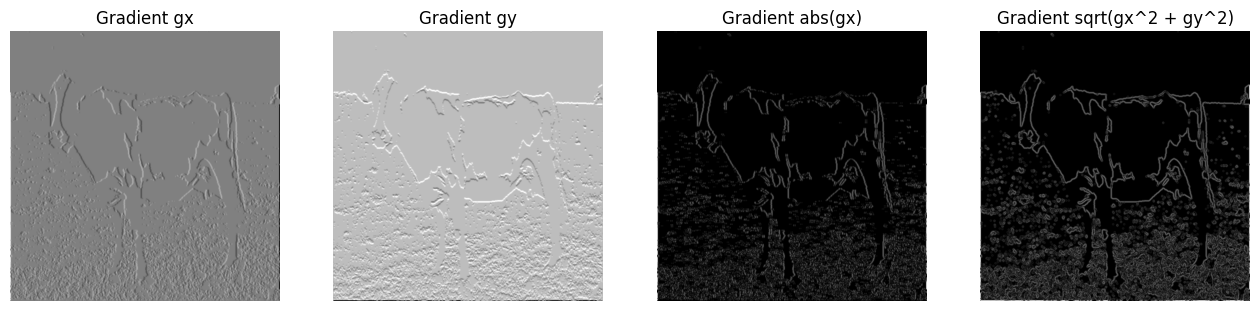

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 4))
ax1.axis('off'); ax2.axis('off'); ax3.axis('off'); ax4.axis('off')

ax1.imshow(gx, cmap=plt.get_cmap('gray'))
ax1.set_title('Gradient gx')

ax2.imshow(gy, cmap=plt.get_cmap('gray'))
ax2.set_title('Gradient gy')

# calcualte abs(gx) and sqrt(gx^2 + gy^2)
abs_gx = [[0]*len(gx[0]) for _ in range(len(gx))]
for i in range(len(gx)):
    for j in range(len(gx[i])):
        abs_gx[i][j] = abs(gx[i][j])

hypot_gx_gy = [[0]*len(gx[0]) for _ in range(len(gx))]
for i in range(len(gx)):
    for j in range(len(gx[i])):
        hypot_gx_gy[i][j] = math.sqrt(gx[i][j]**2 + gy[i][j]**2)

ax3.imshow(abs_gx, cmap=plt.get_cmap('gray'))
ax3.set_title('Gradient abs(gx)')

ax4.imshow(hypot_gx_gy, cmap=plt.get_cmap('gray')) # np.hypo(gx, gy) = np.sqrt(gx**2 + gy**2)
ax4.set_title('Gradient sqrt(gx^2 + gy^2)')
plt.show()

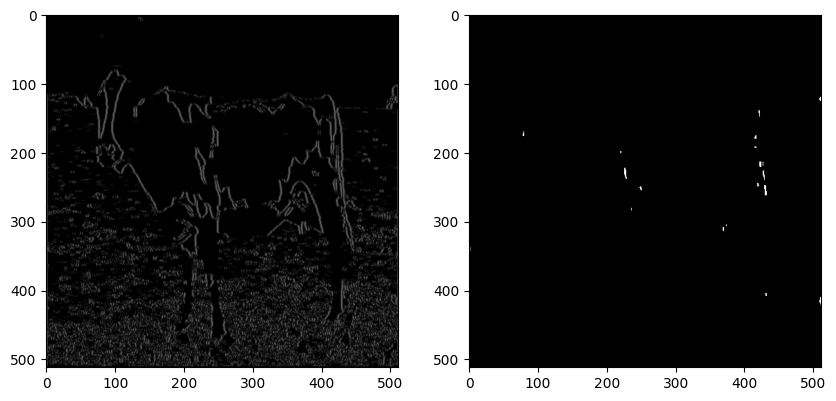

In [ ]:
def apply_median_filter(image, window_size):
    height, width = len(image), len(image[0])
    filtered_image = [[0 for _ in range(width)] for _ in range(height)]

    # Apply the median filter
    for x in range(height):
        for y in range(width):
            pixel_values = []
            for i in range(max(0, x - window_size), min(height, x + window_size + 1)):
                for j in range(max(0, y - window_size), min(width, y + window_size + 1)):
                  if image[i][j] >= 70:
                    image[i][j] = 255
                  else:
                    image[i][j] = 0
                  pixel_values.append(image[i][j])
            pixel_values.sort()
            median_value = pixel_values[len(pixel_values) // 2]
            filtered_image[x][y] = median_value

    return filtered_image

fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(abs_gx, cmap="gray")
filtered = apply_median_filter(abs_gx, 3)

fig.add_subplot(1, 2, 2)
plt.imshow(filtered, cmap="gray")

## HOG

In [ ]:
def compute_hog_cell(n_orientations, magnitudes, orientations):
    bin_width = int(180/n_orientations)
    hog = [0]*n_orientations
    for i in range(len(orientations)):
        for j in range(len(orientations[1])):
            orientation = orientations[i][j]
            lower_bin_idx = int(orientation/bin_width)
            if lower_bin_idx == n_orientations:
                lower_bin_idx = 0

            hog[lower_bin_idx] += magnitudes[i][j]
    for i in range(len(hog)):
        if(len(orientations) == 0):
            hog[i] = 0
        else:
            hog[i] = hog[i]/(len(orientations)*len(orientations[0]))

    return hog
def normalize_vector(v, eps=1e-5):
    sum_v_sqrt = 0
    for i in range(len(v)):
        sum_v_sqrt += v[i]**2
    sum_v_sqrt = math.sqrt(sum_v_sqrt)
    for i in range(len(v)):
        v[i] = v[i]/(sum_v_sqrt+eps)
    return v

# flatten multiple dimension array to 1 dimension array
def ravel(array):
    result = []
    for i in range(len(array)):
        for j in range(len(array[i])):
            for k in range(len(array[i][j])):
                result.append(array[i][j][k])
    return result


def compute_hog(image, n_orientations=9, pixels_per_cell=(8, 8), cells_per_block=(1, 1)):
    gx, gy = calculate_gradient(image)
    sy = len(gx)
    sx = len(gx[0])
    cx, cy = pixels_per_cell
    bx, by = cells_per_block

    magnitudes = [[0]*sx for _ in range(sy)]
    orientations = [[0]*sx for _ in range(sy)]
    for i in range(sy):
        for j in range(sx):
            magnitudes[i][j] = math.sqrt(gx[i][j]**2 + gy[i][j]**2)
            orientations[i][j] = math.atan2(gy[i][j], gx[i][j]) * (180/math.pi)
            if orientations[i][j] < 0:
                orientations[i][j] += 180

    n_cellsx = int(sx/cx)
    n_cellsy = int(sy/cy)
    n_blocksx = int(n_cellsx - by) + 1
    n_blocksy = int(n_cellsy - bx) + 1

    hog_cells = [[[0]*n_orientations for _ in range(n_cellsy)] for _ in range(n_cellsx)]

    prev_x = 0
    for it_x in range(n_cellsx):
        prev_y = 0
        for it_y in range(n_cellsy):
            magnitudes_patch = magnitudes[prev_y: prev_y+cy][prev_x:prev_x + cx]
            orientations_patch = orientations[prev_y: prev_y+cy][prev_x:prev_x + cx]
            hog_cells[it_y][it_x] = compute_hog_cell(n_orientations, magnitudes_patch, orientations_patch)
            prev_y += cy
        prev_x += cx

    hog_blocks_normalized = [[[0]*n_orientations for _ in range(n_blocksy)] for _ in range(n_blocksx)]

    # normalize HOG by block
    for it_blocksx in range(n_blocksx):
        for it_blocky in range(n_blocksy):
            hog_block = ravel(hog_cells[it_blocky:it_blocky+by][it_blocksx:it_blocksx+bx])
            hog_blocks_normalized[it_blocksx][it_blocky] = normalize_vector(hog_block)

    return hog_blocks_normalized

In [ ]:
hog_img = compute_hog(gray)
from skimage.feature import hog

_, hog_img = hog(gray, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(1, 1), visualize=True, multichannel=False)

plt.imshow(hog_img, cmap=plt.get_cmap('gray'))
plt.axis('off')

IndexError: ignored